Clase del 7 de Setiembre

Ejercicio 8:

Calcule la variación de la atenuación en espacio libre de un
enlace a 2 GHz, para un margen de distancias entre 20 y 100
km. Repita para un enlace a 50 GHz.

Ejercicio 9:

Calcule el máximo diámetro del primer elipsoide de Fresnel
para los mismos casos del problema anterior.

Ejercicio 10:
Un sistema receptor tiene las siguientes características en lo
que respecta al ruido:

–
Temperatura de ruido de la antena Ta=1.296°K.

–
Pérdidas en el circuito de antena Lc=0,5 dB.

–
Pérdidas en la línea de transmisión Lt=1,5 dB.

–
Factor de ruido del receptor Fr=8 dB.

–
Anchura de banda b=16 KHz.
Se supone todo el conjunto a temperatura T0.

Calcular: el factor de ruido del sistema, la temperatura
equivalente a la entrada del receptor y la potencia de ruido
normalizada.


Ejercicio 12:

Calcule la distancia al horizonte para una antena de 150 m de
altura sobre Tierra esférica (ae = 6.370 km).

Ejercicio 13:

Suponga un radioenlace por microondas de 45 km sobre
Tierra (ae = 6.370 km) con antenas de 100 y 200 m de altura.
Calcule el punto de reflexión y el factor de divergencia.

Ejercicio 14:

Calcule la pérdida básica de propagación en un vano sobre
mar (RV=0,805, ϕ=2,928 rad) de un radioenlace a 6.125 MHz
que emplea polarización vertical con los siguientes datos:
hT=300 m hR=150 m d=38 km k=4/3


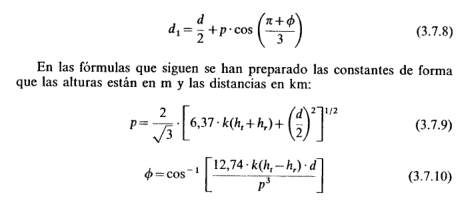

Ejercicio 15:

Repita el ejercicio anterior para un terreno con una rugosidad
de 5 m. Idem para una rugosidad media de 1 m.

Radio de fresnel (Rábanos) = 
$Rn = 548.\sqrt{\frac{n.d1.d2}{f.d}}$

In [ ]:
import math
import numpy as np
import matplotlib as mat
import string 

#EJERCICIO 8
#Variacion de atenuacion de una antena en epacio libre en un enlace de 2 GHz, para un 20 y 100 km, repita para 50 GHz
print("EJERCICIO 8")
fenlace1 = 2
fenlace2 = 50
d1 = 20
d2 = 100

Lb1= 92.4 + 20*math.log(fenlace1) + 20*math.log(d1)
Lb12= 92.4 + 20*math.log(fenlace1) + 20*math.log(d2)
Lb2= 92.4 + 20*math.log(fenlace2) + 20*math.log(d1)
Lb22= 92.4 + 20*math.log(fenlace2) + 20*math.log(d2)

Lb1 = math.trunc(Lb1)
Lb12 = math.trunc(Lb12)
Lb2 = math.trunc(Lb2)
Lb22 = math.trunc(Lb22)

print("La variacion para un enlace de 2 GHz es para 20 km:",Lb1,"dB")
print("La variacion para un enlace de 50 GHz es para 20 km:",Lb12,"dB")
print("La variacion para un enlace de 2 GHz es para 100 km:",Lb2,"dB")
print("La variacion para un enlace de 50 GHz es para 100 km:",Lb22,"dB")

#EJERCICIO 9
print("EJERCICIO 9")
F1a2 = 17.3*((d1*d2/fenlace1)**1/2)
F1a50 = 17.3*((d1*d2/fenlace2)**1/2)

print("El primer elipsoide de Fresnel para una frec de 2GHz es de:", F1a2, " metros")
print("El primer elipsoide de Fresnel para una frec de 50GHz es de:", F1a50, "metros")


#EJERCICIO 10
print("EJERCICIO 10")
ta = 1.296 #Kelvin
to = 1 #Kelvin
lc = 0.5 #dB
lt = 1.5 #dB
fr = 8 #dB
bw = 16 #KHz
greceptor = 1
kboltz = 1.38e-23

#factor ruido del sistema
fa = ta/to #=ta
frs = fa + lc*lt*fr - 1

#Temperatura equivalente
tq = ta/(lc*lt) + to*(lc-1)/(lc*lt) + to*(lt-1)/lt + to*(fr-1)

#Potencia de ruido

pn = kboltz*tq*bw*greceptor

print("El factor ruido del sistema es:", frs)
print("La temperatura equivalente a la entrada del receptor es:",tq,"Kelvin")
print("La potencia del ruido normalizada es:",pn,"Watts")

#EJERCICIO 12
print("EJERCICIO 12")
ht = 150
ae = 6370e3

dv = (2*ae*ht)**(1/2)
dvint = math.trunc(dv/1000)


print("La distancia al horizonte es de:",dvint,"Kilometros")
#EJERCICIO 13
print("EJERCICIO 13")
dist = 45 #km
aekm = 6370
h2 = 100
h1 = 200

h1prim = h1 - (dist)**2/(2*aekm)
h2prim = h2 - (dist)**2/(2*aekm)

m= (1e3*dist**2)/(4*aekm*(h1+h2))

c= (h1-h2)/(h1+h2)

b= 2*np.sqrt((m+1)/3*m)
barccossqrt = np.sqrt(3*m/((m+1)**3))
barccos = np.arccos(barccossqrt*3*c/2)
bcos = np.cos(np.pi/3 + (1/3)*barccos)
b= b*bcos

print(b)
print(c)
print(barccossqrt)
print(barccos)
print(bcos)

d1 = dist*(1+b)/2

Dgrande = np.sqrt((1-m*(1+b**2))/(1+m*(1-3*b**2)))

print("El punto de reflexión es:",d1, "Km")
print("El factor de divergencia es:",Dgrande)


#EJERCICIO 14
print("EJERCICIO 14")
#datos
ref = 6.125
Rv = 0.805
phi = 2.928

ht = 300
hr = 150
d = 38
k = 4/3

#hay que despejar C
#Pérdida total es Lb = Lbf + Ldi + Ld + La + Lp + Lg
#Lb = Lbf + Ldi
C = np.sqrt(np.abs(np.sin(phi)*(Rv-1)/(-Rv-1)))
print (C)

#Calculamos L y W (no hace falta porque estamos en el mar)
L1 = d*np.sqrt(1+4*ref*ht*hr*1e-2/3*d)*((1+ref*((ht+hr)**2)*1e-2/3*d)**1e-1)
W1 = np.sqrt(3*1e-4*d/ref)
print(L1,W1)

#Calculamos Rs, ya que no tenemos delta x, hacemos Rs = 1
Rs = 1

#Calculamos Rr haciendo g=0.3 (superficie lisa limite para el mar)
#Falta el factor de divergencia D = 1 (como ejemplo 1) (hallamos mediante b al cuadrado con las ecuaciones del ejercicio 13)

Rr = np.sqrt((1+(0.3*2)/2)/(1+2.35*((0.3**2)/2)+np.pi*2*((0.3**2)/2)**2))
print(Rr)
Coefreflex = Rv*1*Rs*Rr
print(Coefreflex)

#Hallamos la pérdida básica de transmisión en espacio libre ahora

Lbff = 92.4 + 20*np.log10(ref) + 20*np.log10(d)

#multiplicamos por nuestro coeficiente de reflexión 

Lbfreflex = Lbff*Coefreflex

#La suma de ambas es la pérdida total del vano

Lbftotal = Lbff+Lbfreflex 

print("La pérdida básica de propagación del vano es de:",Lbftotal, "dB")

####################################
print("METODO DEL LIBRO:")
###################################

#Hallar polarizacion vertical
#Primero hallamos d1 y d2
pp= (2/np.sqrt(3))*((6.37*k*(ht+hr)+(d/2)**2)**(1/2))
dej1= d/2 + pp*np.cos((np.pi+phi)/3)
dej2= d-dej1
#hallamos ht' y hr'
h_t= ht - (4*d**2/51*k)
h_r= hr - (4*d**2/51*k)
#hallamos el rayo incidente
radinc = (h_t+h_r)/2*1e3 #en miliradianes
#si phi > phi(lim) hallamos ahora D
#DONDE PHI (LIM) = (5400/f)^1/3
D = (1+(5/16*k)*((dej1**2)*dej2/d*h_t))**(-1/2)
#la diferencia de trayectos vale delta(I)=1.94 m
#el angulo de desfasamiento vale delta = 248,8 rad
#que es iguala delta = 3.82 rad
#ASI Coeficiente de reflexion es:
# mod(R) = 0.805
# Fase = -Beta = -167,74° i -2.928 rad
# EL valor del campo es e=1.69*eo
######################################
# Y la pérdida básica es de = 135.2 dB
print("PERDIDA ES TODO EN ESTA VIDA: 135.2 dB")
######################################

#EJERCICIO 15
print("EJERCICIO 15")





EJERCICIO 8
La variacion para un enlace de 2 GHz es para 20 km: 166 dB
La variacion para un enlace de 50 GHz es para 20 km: 198 dB
La variacion para un enlace de 2 GHz es para 20 km: 230 dB
La variacion para un enlace de 50 GHz es para 20 km: 262 dB
EJERCICIO 9
El primer elipsoide de Fresnel para una frec de 2GHz es de: 8650.0  metros
El primer elipsoide de Fresnel para una frec de 50GHz es de: 346.0 metros
EJERCICIO 10
El factor ruido del sistema es: 6.296
La temperatura equivalente a la entrada del receptor es: 8.394666666666666 Kelvin
La potencia del ruido normalizada es: 1.8535423999999997e-21 Watts
EJERCICIO 12
La distancia al horizonte es de: 43 Kilometros
EJERCICIO 13
0.07087311393764342
0.3333333333333333
0.6266448562672452
1.2521067106499157
0.10603018786085677
El punto de reflexión es: 24.094645063596978 Km
El factor de divergencia es: 0.7628368837012462
EJERCICIO 14
0.15132763026316556
46981.32319998424 0.04314191105869
1.0780994796025487
0.8678700810800518
La pérdida básica